In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import requests

In [2]:
plt.style.use('ggplot')

In [3]:
# from https://data.giss.nasa.gov/gistemp/
# Global-mean monthly, seasonal, and annual means, 1880-present, 
# updated through most recent month CSV file.
url0 = "https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv"
file0 = 'data/nasa_temp_mean.csv'
# From https://wattsupwiththat.com/2017/11/01/global-temperature-continues-to-cool/
url1 = "https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt"
file1 = 'data/hadcrut_mean.txt'
for url,filename in [(url0,file0), (url1,file1)]:
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)

In [4]:
# create data frame from the Nasa data
d = {
    "Year": [],
    "Month": [],
    "Mean_Nasa": []
}
with open(file0,"r") as f:
    _ = f.readline()
    cf = csv.DictReader(f)
    for l in cf:
        for i,m in enumerate('Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec'.split()):
            try:
                d['Mean_Nasa'].append(float(l[m]))
                d['Year'].append(int(l['Year']))
                d['Month'].append(i)
            except ValueError:
                pass
df = pd.DataFrame(d)
df.set_index(["Year","Month"],inplace=True)

In [5]:
# create data frame from the HadCRUT data
d2 = {
    "Year": [],
    "Month": [],
    "Mean": []
}
with open(file1,"r") as f:
    for l in f:
        cols = l.split()
        y,m = cols[0].split('/')
        try:
            d2['Mean'].append(float(cols[1]))
            d2['Year'].append(int(y))
            d2['Month'].append(int(m)-1)
        except ValueError:
            pass
df2 = pd.DataFrame(d2)
df2.set_index(["Year","Month"],inplace=True)

In [6]:
# merge the data
df["Mean_HadCRUT"] = df2["Mean"]

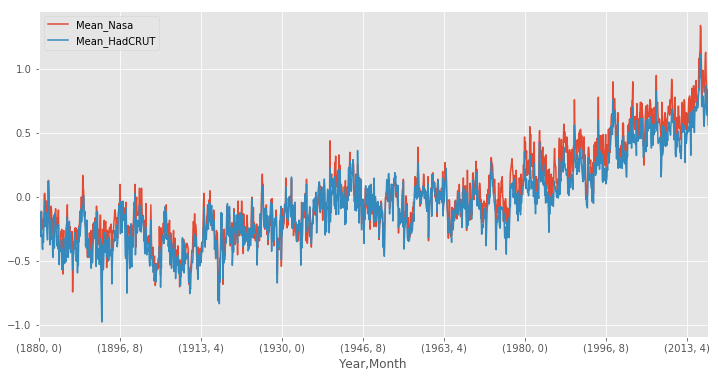

In [7]:
# plot it all
df.plot(figsize=(12,6))

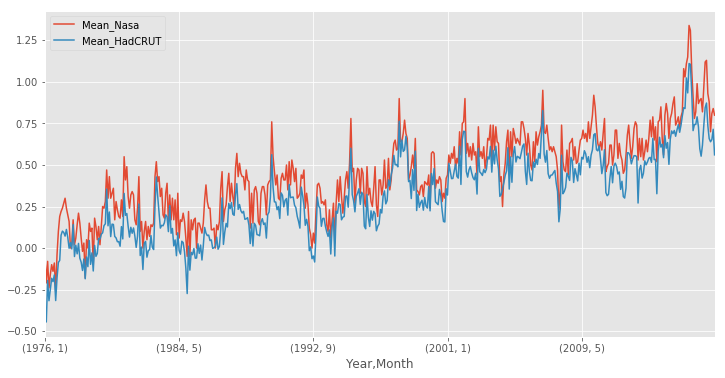

In [8]:
# plot some more recent data
df.tail(500).plot(figsize=(12,6))

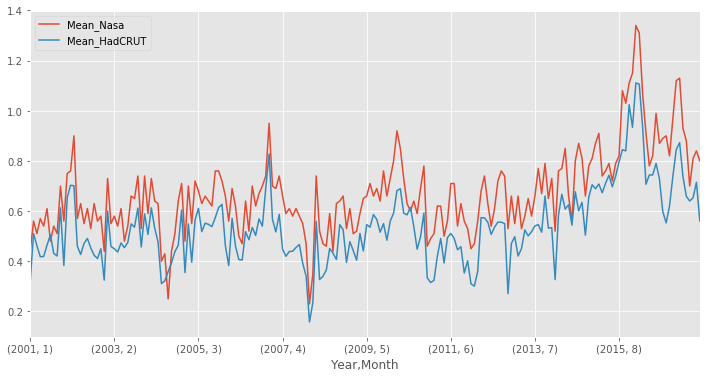

In [9]:
# even more recent
df.tail(200).plot(figsize=(12,6))